<a href="https://colab.research.google.com/github/jeff0908/stock_predict/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

In [4]:
!pip install pandas_datareader
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
#get stock info
start = '2014-01-01'
end = '2024-03-01'
stock = 'TSLA'
df = web.DataReader(stock, data_source='stooq', start=start, end=end)
df = df.sort_index(ascending=True)
#show data
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,9.98667,10.1653,9.77000,10.00670,92901195
2014-01-03,10.00000,10.1460,9.90667,9.97067,70449450
2014-01-06,10.00000,10.0267,9.68267,9.80000,80483160
2014-01-07,9.84133,10.0267,9.68333,9.95733,75540315
2014-01-08,9.92333,10.2467,9.91733,10.08530,92476215
...,...,...,...,...,...
2024-02-26,192.29000,201.7800,192.00000,199.40000,111747116
2024-02-27,204.04000,205.6000,198.26000,199.73000,108645412
2024-02-28,200.42000,205.3000,198.44000,202.04000,99806173


In [36]:
#get row and columns in the data
df.shape

(2558, 5)

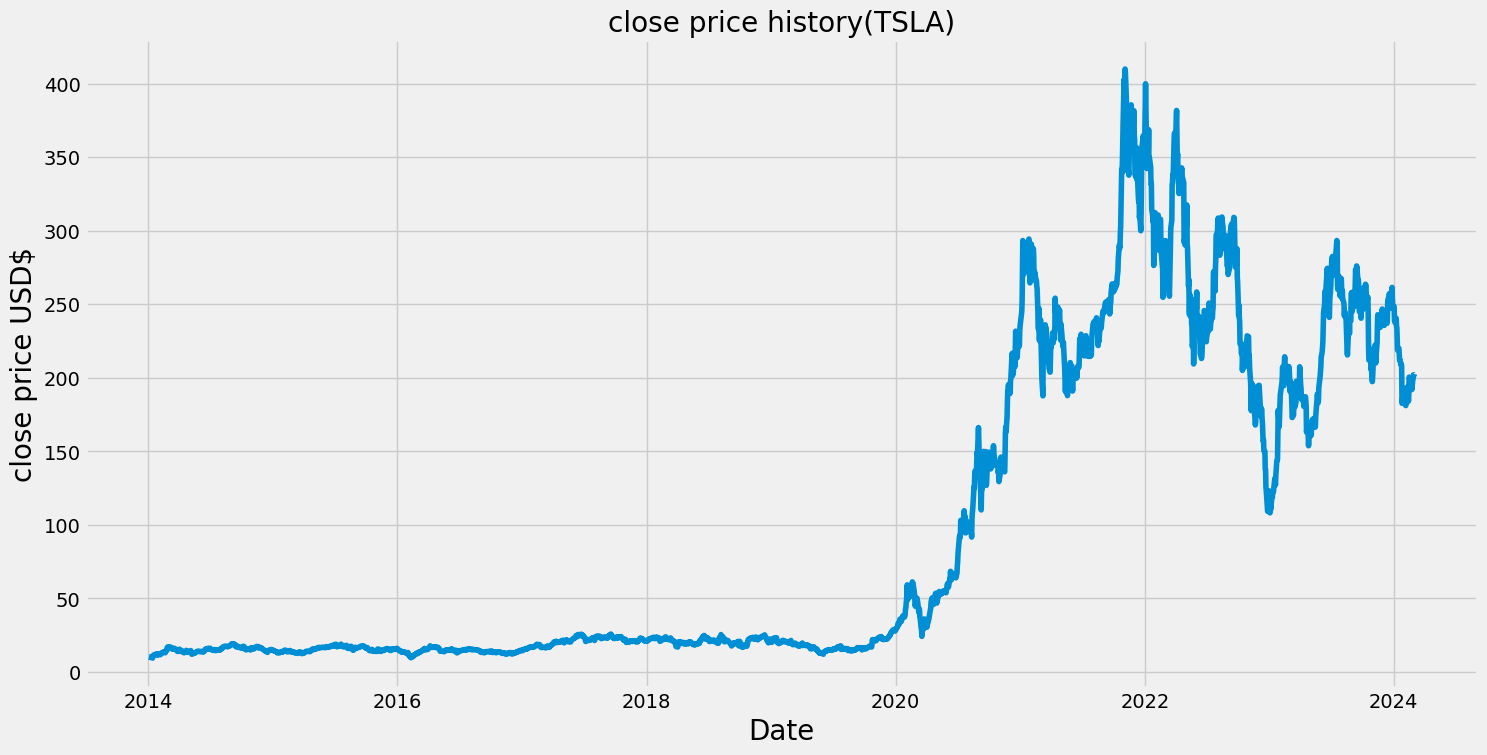

In [37]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('close price history(TSLA)')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('close price USD$', fontsize=20)
plt.show()

In [38]:
#create new dataframe(ondy close column)
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2047

In [39]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00179038],
       [0.00170046],
       [0.00127451],
       ...,
       [0.48105807],
       [0.48065875],
       [0.48255552]])

In [40]:
#create the training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00179038, 0.00170046, 0.00127451, 0.00166716, 0.00198654,
       0.00136268, 0.00106154, 0.        , 0.00364872, 0.00412466,
       0.00526272, 0.00510299, 0.00621285, 0.00652557, 0.00701474,
       0.00586669, 0.0050381 , 0.00649562, 0.00597151, 0.00723761,
       0.00699976, 0.00628423, 0.00655377, 0.00583674, 0.00649562,
       0.00785156, 0.00952047, 0.00953046, 0.00931408, 0.01003135,
       0.00979825, 0.01070845, 0.00903455, 0.01175168, 0.01169003,
       0.0130295 , 0.01807916, 0.01891124, 0.01883462, 0.01754856,
       0.01850519, 0.01921722, 0.01885459, 0.01890126, 0.01778142,
       0.01655525, 0.01581801, 0.016996  , 0.01638055, 0.01524573,
       0.01574663, 0.01675491, 0.0160561 , 0.01590137, 0.01489957,
       0.01344879, 0.01349371, 0.01224908, 0.01131068, 0.012151  ])]
[0.011498857681355074]



In [41]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1987, 60, 1)

In [43]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1987/1987 [==============================] - 72s 34ms/step - loss: 0.0020


In [46]:
#create the testing data
test_data = scaled_data[training_data_len -60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [47]:
#conver data to numpy array
x_test = np.array(x_test)

In [48]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
#get predicet price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 28ms/step


In [50]:
#get the rmse
rmse = np.sqrt(np.mean( predictions -y_test) **2)
rmse

13.986943757596547

<ipython-input-51-033619bfdfbf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


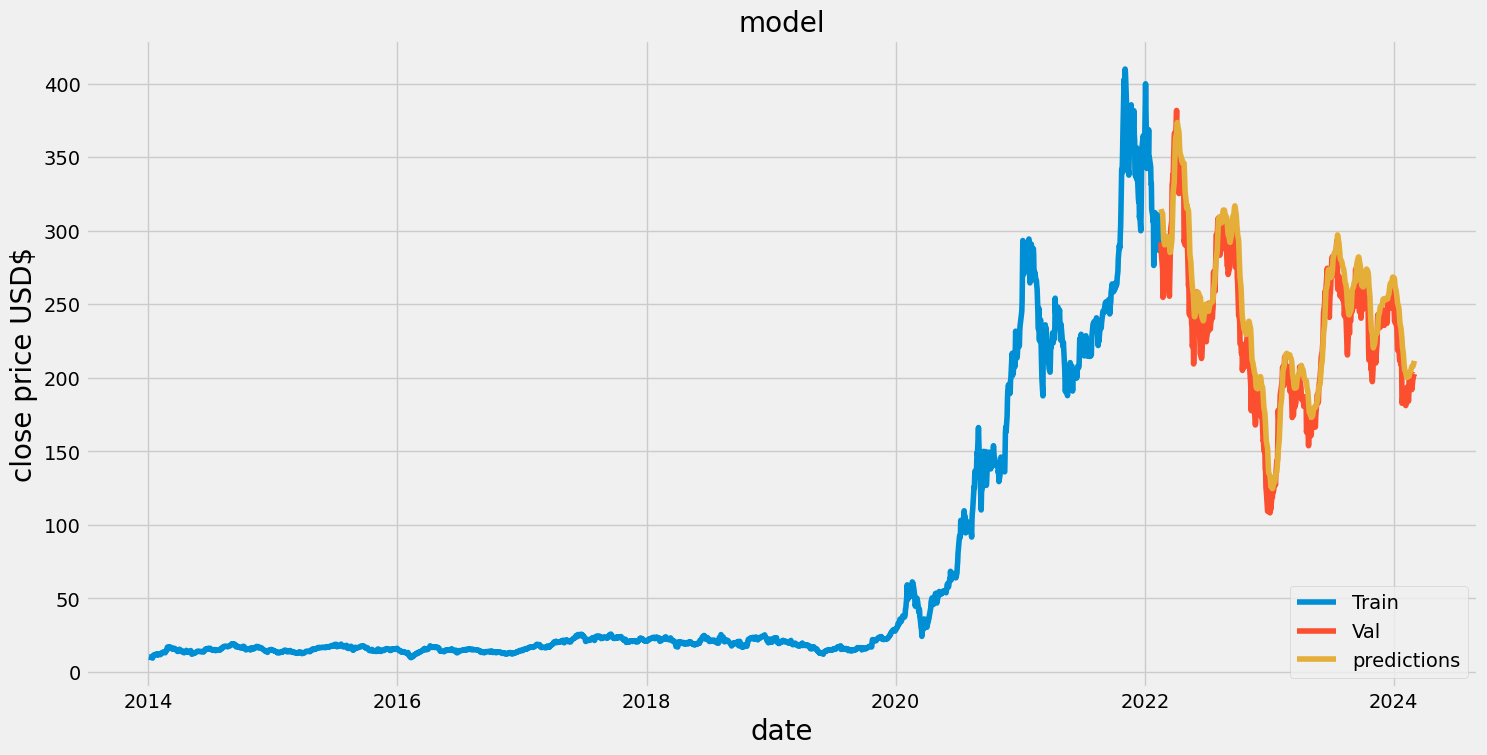

In [51]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
valid.index
#visualize
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date', fontsize=20)
plt.ylabel('close price USD$', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
plt.show()